In [2185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2186]:
# training and testing datasets
trainingSet = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') 
testingSet = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

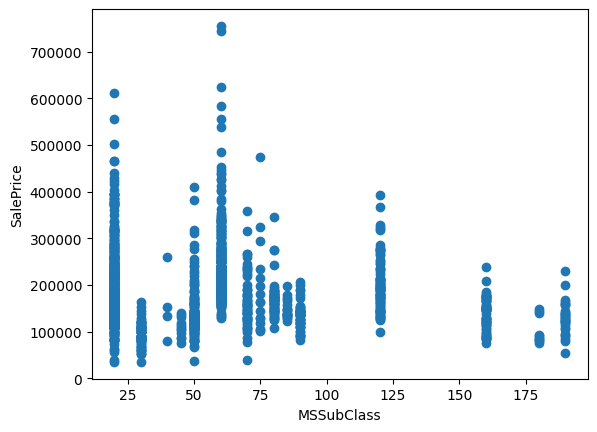

In [2187]:
# Removing outliers
import matplotlib.pyplot as p
p.figure()
p.scatter(x = 'MSSubClass',y = 'SalePrice', data = trainingSet)
p.xlabel('MSSubClass')
p.ylabel('SalePrice')
p.show()

In [2188]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


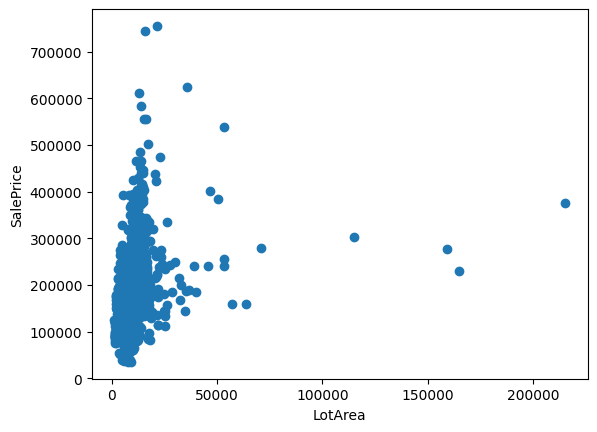

In [2189]:
p.figure()
p.scatter(x = 'LotArea',y = 'SalePrice', data = trainingSet)
p.xlabel('LotArea')
p.ylabel('SalePrice')
p.show()

In [2190]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2191]:
trainingSet.loc[trainingSet['LotArea'] > 100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


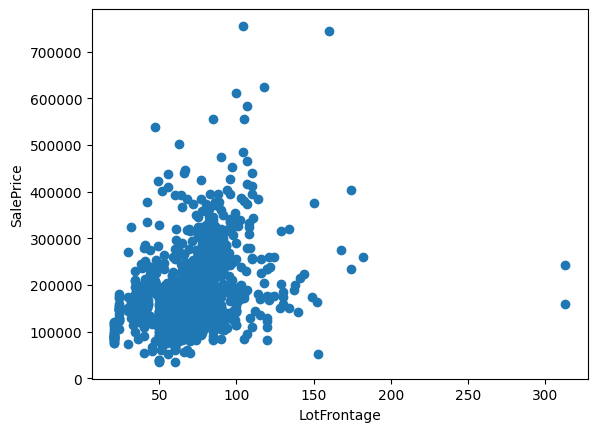

In [2192]:
p.figure()  
p.scatter(x='LotFrontage', y='SalePrice', data=trainingSet)
p.xlabel('LotFrontage')
p.ylabel('SalePrice')
p.show()

In [2193]:
trainingSet.loc[trainingSet['LotFrontage'] > 200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


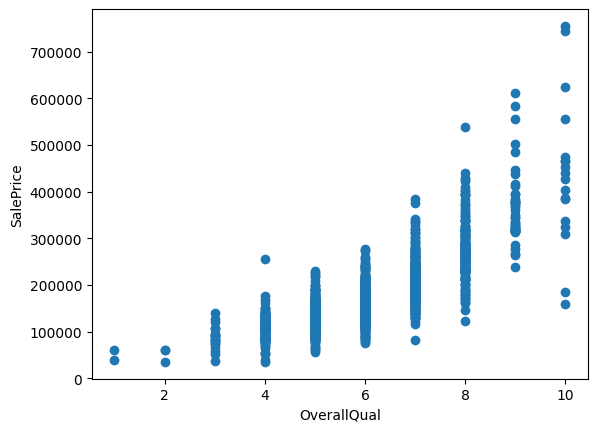

In [2194]:
p.figure()  
p.scatter(x='OverallQual', y='SalePrice', data=trainingSet)
p.xlabel('OverallQual')
p.ylabel('SalePrice')
p.show()

In [2195]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


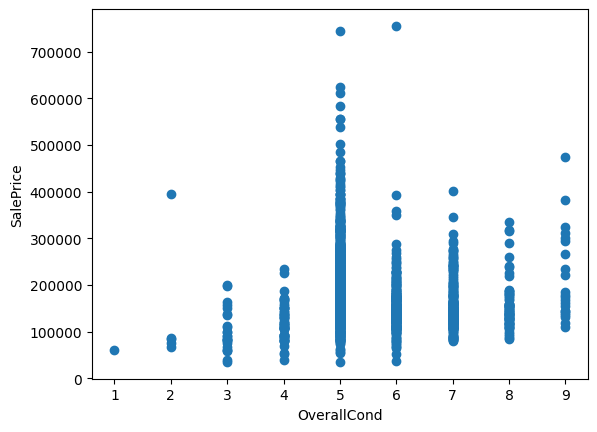

In [2196]:
p.figure()  
p.scatter(x='OverallCond', y='SalePrice', data=trainingSet)
p.xlabel('OverallCond')
p.ylabel('SalePrice')
p.show()

In [2197]:
trainingSet.loc[(trainingSet['OverallCond'] == 2) & (trainingSet['SalePrice'] > 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [2198]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


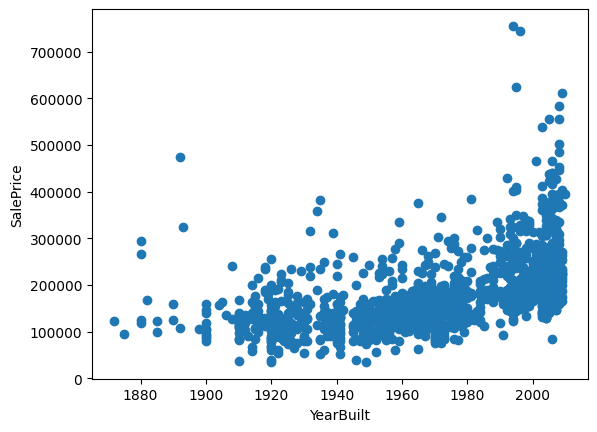

In [2199]:
p.figure()  
p.scatter(x='YearBuilt', y='SalePrice', data=trainingSet)
p.xlabel('YearBuilt')
p.ylabel('SalePrice')
p.show()

In [2200]:
trainingSet.loc[((trainingSet['YearBuilt'] >= 1880) & (trainingSet['YearBuilt'] <= 1900)) & (trainingSet['SalePrice'] > 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000


In [2201]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


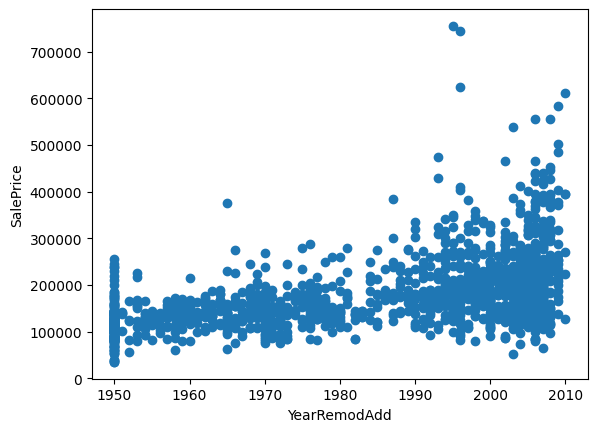

In [2202]:
p.figure()  
p.scatter(x='YearRemodAdd', y='SalePrice', data=trainingSet)
p.xlabel('YearRemodAdd')
p.ylabel('SalePrice')
p.show()

In [2203]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


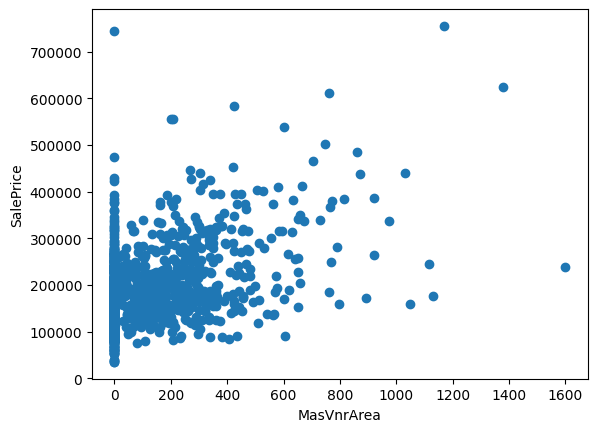

In [2204]:
p.figure()  
p.scatter(x='MasVnrArea', y='SalePrice', data=trainingSet)
p.xlabel('MasVnrArea')
p.ylabel('SalePrice')
p.show()

In [2205]:
trainingSet.loc[(trainingSet['MasVnrArea'] >= 1200) | (trainingSet['SalePrice'] >= 700000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


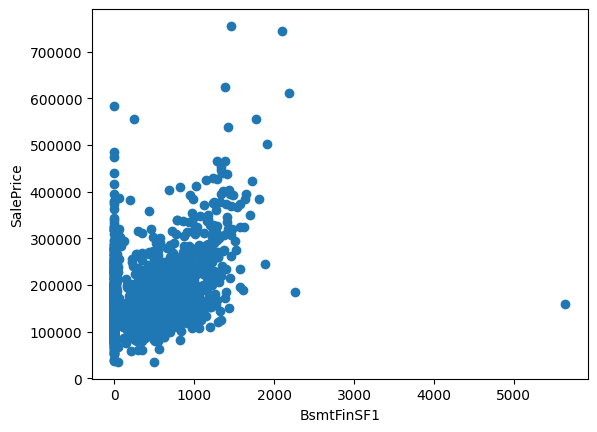

In [2206]:
p.figure()  
p.scatter(x='BsmtFinSF1', y='SalePrice', data=trainingSet)
p.xlabel('BsmtFinSF1')
p.ylabel('SalePrice')
p.show()

In [2207]:
trainingSet.loc[(trainingSet['BsmtFinSF1'] > 3000) | (trainingSet['SalePrice'] > 600000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


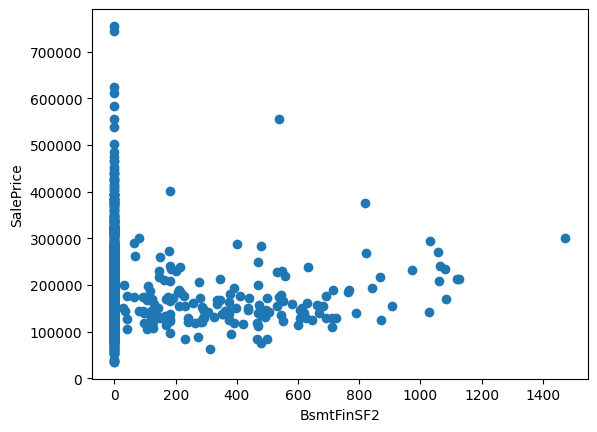

In [2208]:
p.figure()  
p.scatter(x='BsmtFinSF2', y='SalePrice', data=trainingSet)
p.xlabel('BsmtFinSF2')
p.ylabel('SalePrice')
p.show()

In [2209]:
trainingSet.loc[trainingSet['BsmtFinSF2'] > 1200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [2210]:
trainingSet.loc[(trainingSet['BsmtFinSF2'] > 200) & (trainingSet['BsmtFinSF2']< 900) & (trainingSet['SalePrice'] > 350000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


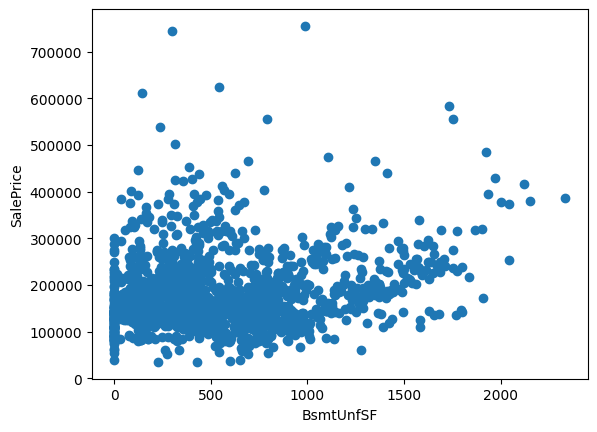

In [2211]:
p.figure()  
p.scatter(x='BsmtUnfSF', y='SalePrice', data=trainingSet)
p.xlabel('BsmtUnfSF')
p.ylabel('SalePrice')
p.show()

In [2212]:
trainingSet.loc[trainingSet['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


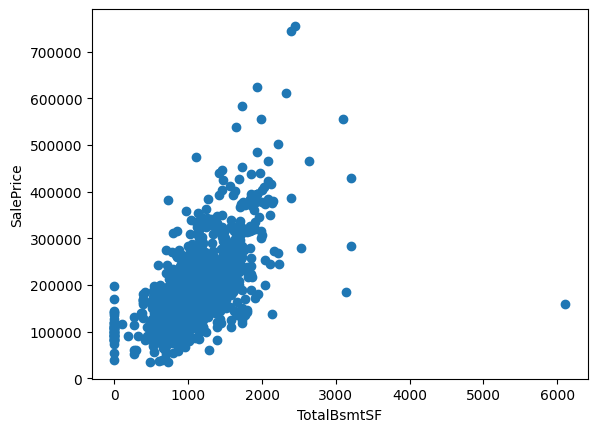

In [2213]:
p.figure()  
p.scatter(x='TotalBsmtSF', y='SalePrice', data=trainingSet)
p.xlabel('TotalBsmtSF')
p.ylabel('SalePrice')
p.show()

In [2214]:
trainingSet.loc[(trainingSet['SalePrice'] > 700000) | (trainingSet['TotalBsmtSF'] >= 6000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


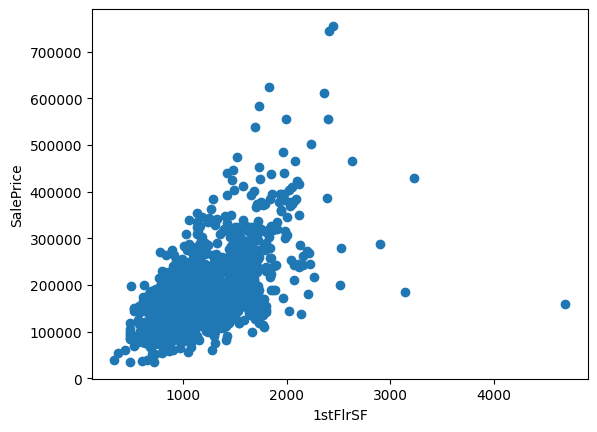

In [2215]:
p.figure()  
p.scatter(x='1stFlrSF', y='SalePrice', data=trainingSet)
p.xlabel('1stFlrSF')
p.ylabel('SalePrice')
p.show()

In [2216]:
trainingSet.loc[(trainingSet['SalePrice'] > 700000) | (trainingSet['1stFlrSF'] > 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


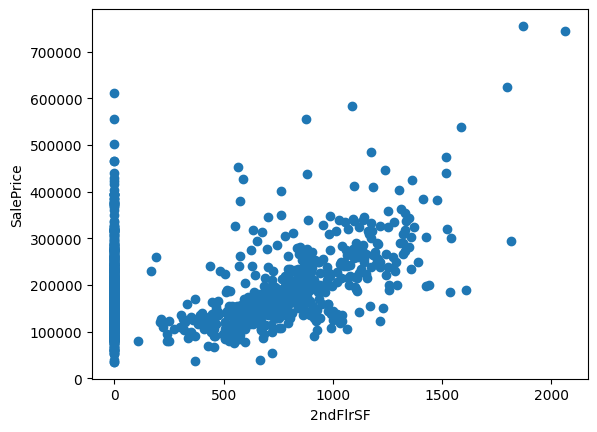

In [2217]:
p.figure()  
p.scatter(x='2ndFlrSF', y='SalePrice', data=trainingSet)
p.xlabel('2ndFlrSF')
p.ylabel('SalePrice')
p.show()

In [2218]:
trainingSet.loc[(trainingSet['SalePrice'] > 600000) | (trainingSet['2ndFlrSF'] > 1750)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


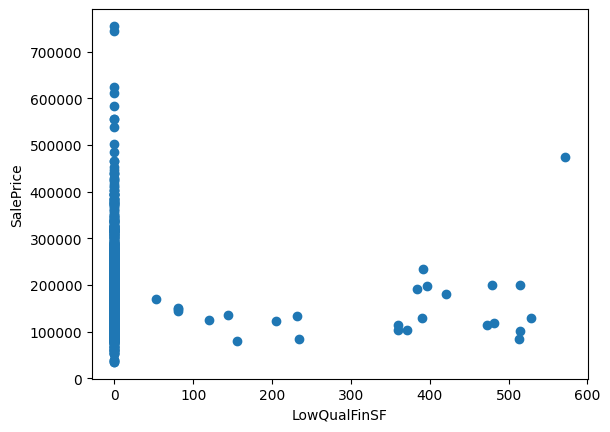

In [2219]:
p.figure()  
p.scatter(x='LowQualFinSF', y='SalePrice', data=trainingSet)
p.xlabel('LowQualFinSF')
p.ylabel('SalePrice')
p.show()

In [2220]:
trainingSet.loc[(trainingSet['SalePrice'] > 700000) | (trainingSet['LowQualFinSF'] > 550)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


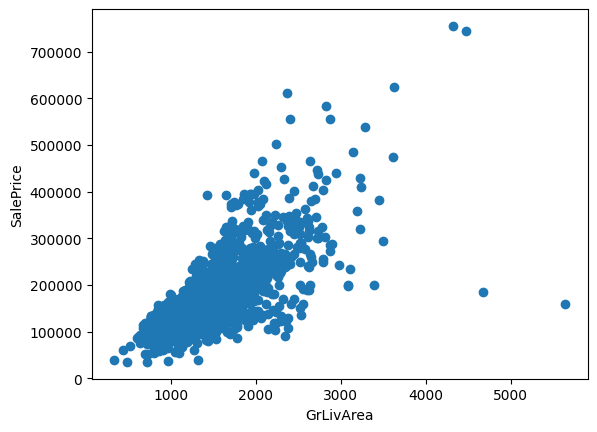

In [2221]:
p.figure()  
p.scatter(x='GrLivArea', y='SalePrice', data=trainingSet)
p.xlabel('GrLivArea')
p.ylabel('SalePrice')
p.show()

In [2222]:
trainingSet.loc[(trainingSet['SalePrice'] > 6500000) | (trainingSet['GrLivArea'] >= 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


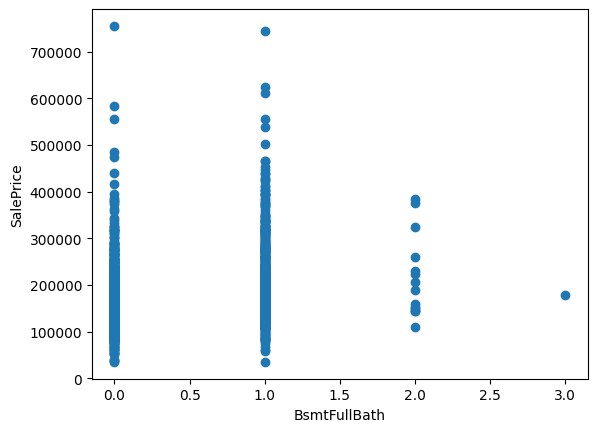

In [2223]:
p.figure()  
p.scatter(x='BsmtFullBath', y='SalePrice', data=trainingSet)
p.xlabel('BsmtFullBath')
p.ylabel('SalePrice')
p.show()

In [2224]:
trainingSet.loc[(trainingSet['SalePrice'] > 700000) | (trainingSet['BsmtFullBath'] > 2.5)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


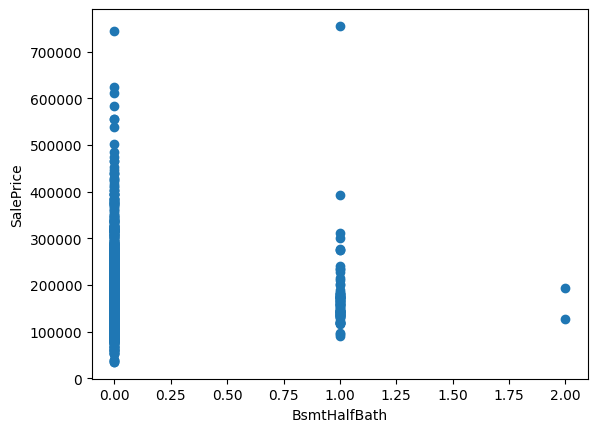

In [2225]:
p.figure()  
p.scatter(x='BsmtHalfBath', y='SalePrice', data=trainingSet)
p.xlabel('BsmtHalfBath')
p.ylabel('SalePrice')
p.show()

In [2226]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


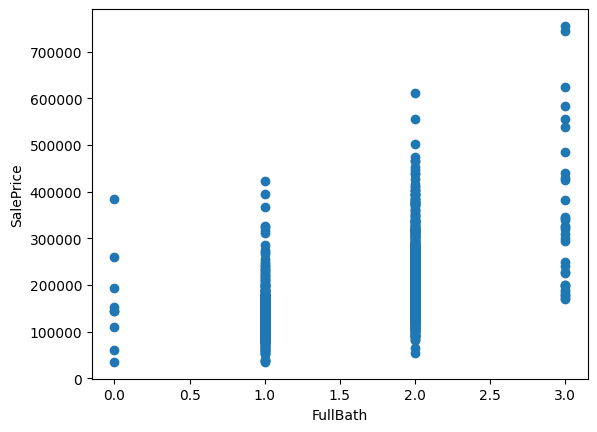

In [2227]:
p.figure()  
p.scatter(x='FullBath', y='SalePrice', data=trainingSet)
p.xlabel('FullBath')
p.ylabel('SalePrice')
p.show()

In [2228]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


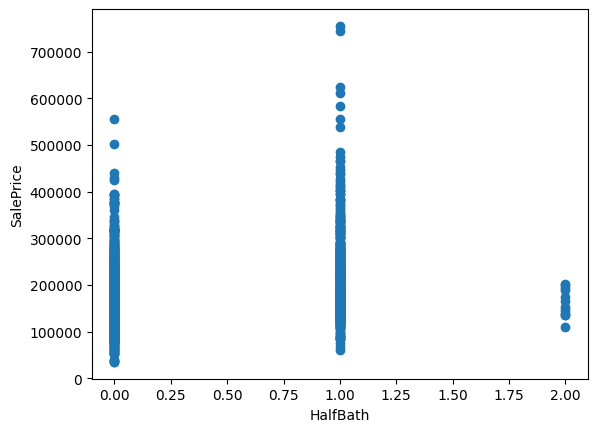

In [2229]:
p.figure()  
p.scatter(x='HalfBath', y='SalePrice', data=trainingSet)
p.xlabel('HalfBath')
p.ylabel('SalePrice')
p.show()

In [2230]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


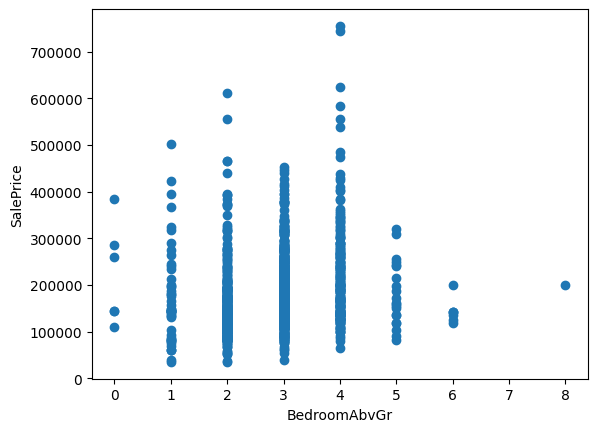

In [2231]:
p.figure()  
p.scatter(x='BedroomAbvGr', y='SalePrice', data=trainingSet)
p.xlabel('BedroomAbvGr')
p.ylabel('SalePrice')
p.show()

In [2232]:
trainingSet.loc[(trainingSet['SalePrice'] > 700000) | (trainingSet['BedroomAbvGr'] == 8)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


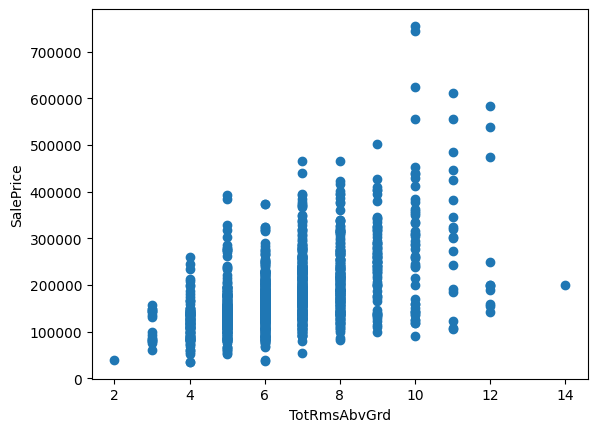

In [2233]:
p.figure()  
p.scatter(x='TotRmsAbvGrd', y='SalePrice', data=trainingSet)
p.xlabel('TotRmsAbvGrd')
p.ylabel('SalePrice')
p.show()

In [2234]:
trainingSet.loc[trainingSet['SalePrice'] > 650000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


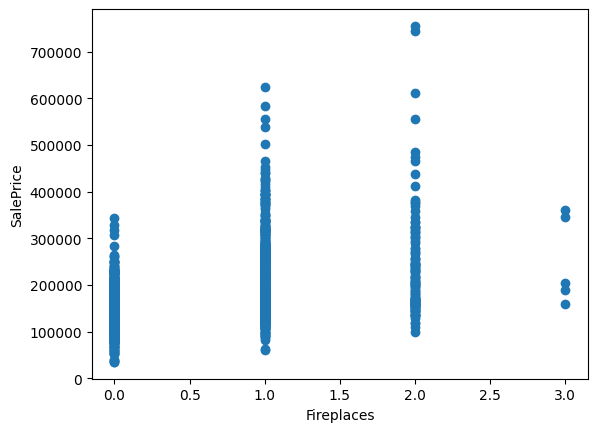

In [2235]:
p.figure()  
p.scatter(x='Fireplaces', y='SalePrice', data=trainingSet)
p.xlabel('Fireplaces')
p.ylabel('SalePrice')
p.show()

In [2236]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


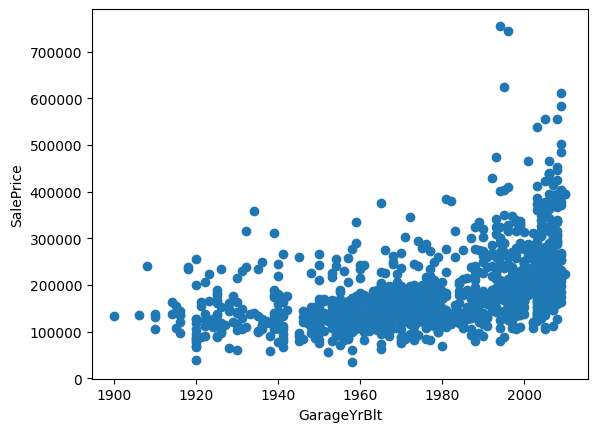

In [2237]:
p.figure()  
p.scatter(x='GarageYrBlt', y='SalePrice', data=trainingSet)
p.xlabel('GarageYrBlt')
p.ylabel('SalePrice')
p.show()

In [2238]:
trainingSet.loc[trainingSet['SalePrice'] >= 650000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


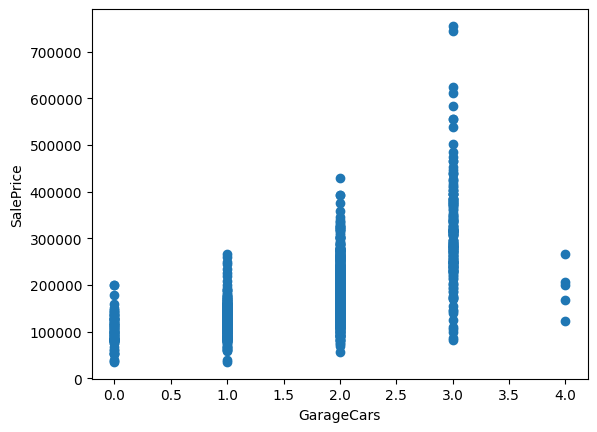

In [2239]:
p.figure()  
p.scatter(x='GarageCars', y='SalePrice', data=trainingSet)
p.xlabel('GarageCars')
p.ylabel('SalePrice')
p.show()

In [2240]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


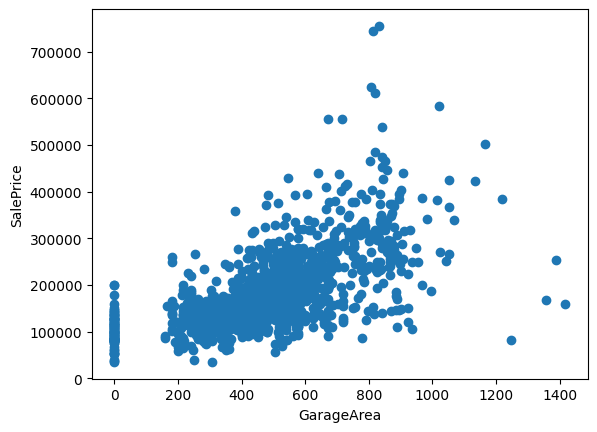

In [2241]:
p.figure()  
p.scatter(x='GarageArea', y='SalePrice', data=trainingSet)
p.xlabel('GarageArea')
p.ylabel('SalePrice')
p.show()

In [2242]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


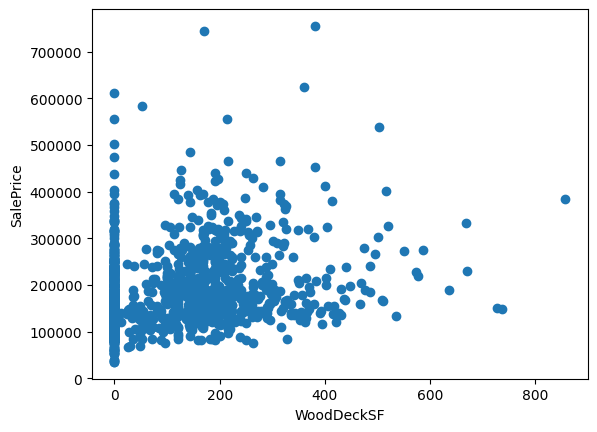

In [2243]:
p.figure()  
p.scatter(x='WoodDeckSF', y='SalePrice', data=trainingSet)
p.xlabel('WoodDeckSF')
p.ylabel('SalePrice')
p.show()

In [2244]:
trainingSet.loc[trainingSet['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


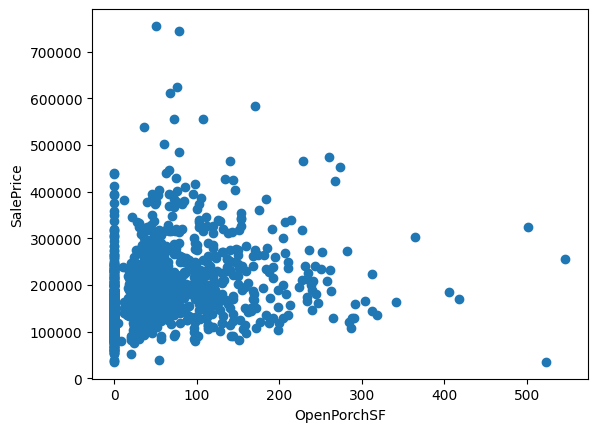

In [2245]:
p.figure()  
p.scatter(x='OpenPorchSF', y='SalePrice', data=trainingSet)
p.xlabel('OpenPorchSF')
p.ylabel('SalePrice')
p.show()

In [2246]:
trainingSet.loc[trainingSet['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


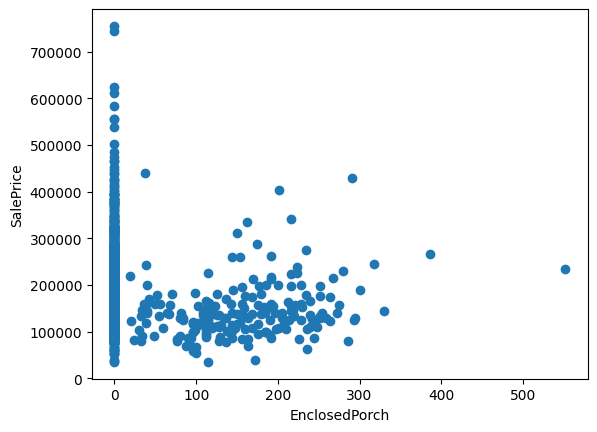

In [2247]:
p.figure()  
p.scatter(x='EnclosedPorch', y='SalePrice', data=trainingSet)
p.xlabel('EnclosedPorch')
p.ylabel('SalePrice')
p.show()

In [2248]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


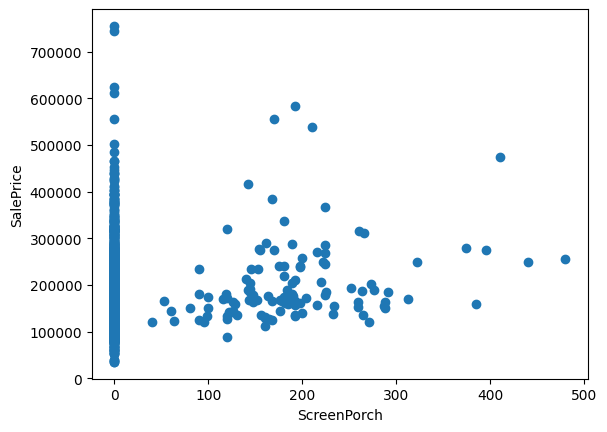

In [2249]:
p.figure()  
p.scatter(x='ScreenPorch', y='SalePrice', data=trainingSet)
p.xlabel('ScreenPorch')
p.ylabel('SalePrice')
p.show()

In [2250]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


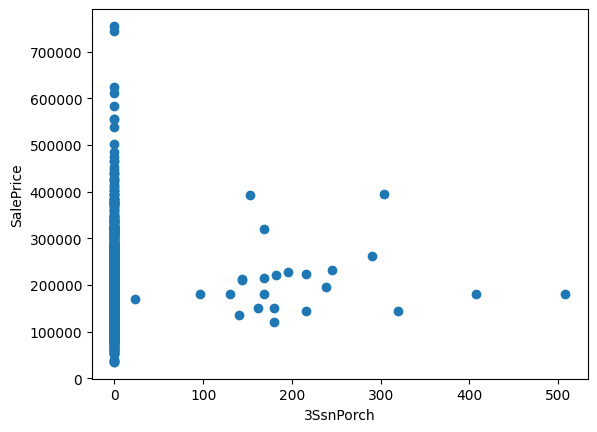

In [2251]:
p.figure()  
p.scatter(x='3SsnPorch', y='SalePrice', data=trainingSet)
p.xlabel('3SsnPorch')
p.ylabel('SalePrice')
p.show()

In [2252]:
trainingSet.loc[trainingSet['SalePrice'] > 700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


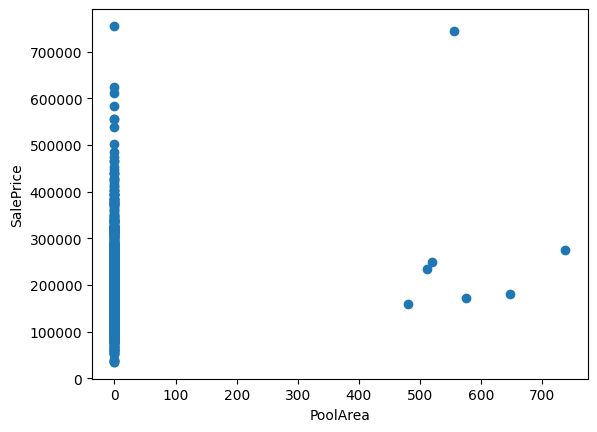

In [2253]:
p.figure()  
p.scatter(x='PoolArea', y='SalePrice', data=trainingSet)
p.xlabel('PoolArea')
p.ylabel('SalePrice')
p.show()

In [2254]:
trainingSet.loc[trainingSet['SalePrice'] > 650000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


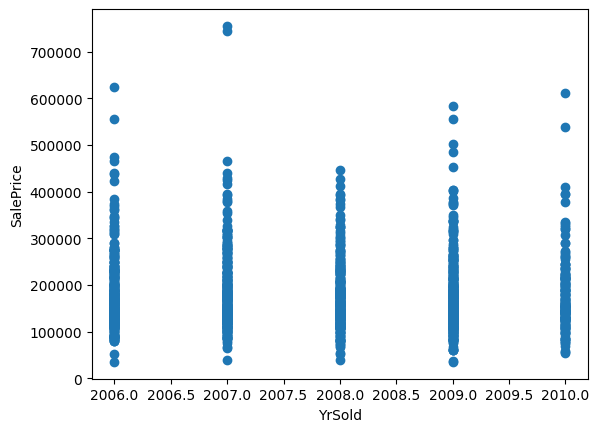

In [2255]:
p.figure()  
p.scatter(x='YrSold', y='SalePrice', data=trainingSet)
p.xlabel('YrSold')
p.ylabel('SalePrice')
p.show()

In [2256]:
trainingSet.loc[trainingSet['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [2257]:
removeId = [692, 1183, 250, 314, 336, 707, 935, 1299, 379, 186, 584, 298, 1170, 899, 323, 441, 305, 524, 739, 636]

trainingSet = trainingSet[~trainingSet['Id'].isin(removeId)]

In [2258]:
# Drop missing values (NaNs)

trainingSet.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1435
MiscFeature     1388
Alley           1351
Fence           1162
MasVnrType       863
FireplaceQu      688
LotFrontage      256
GarageYrBlt       79
GarageCond        79
GarageType        79
GarageFinish      79
GarageQual        79
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [2259]:
removeCol = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage']
trainingSet = trainingSet.drop(columns = removeCol)
testingSet = testingSet.drop(columns = removeCol)

In [2260]:
trainingSet['GarageYrBlt'] = trainingSet['GarageYrBlt'].fillna(0)
testingSet['GarageYrBlt'] = testingSet['GarageYrBlt'].fillna(0)

In [2261]:
trainingSet['GarageCond'] = trainingSet['GarageCond'].fillna('No')
testingSet['GarageCond'] = testingSet['GarageCond'].fillna('No')

In [2262]:
trainingSet['GarageType'] = trainingSet['GarageType'].fillna('No')
testingSet['GarageType'] = testingSet['GarageType'].fillna('No')

In [2263]:
trainingSet['GarageFinish'] = trainingSet['GarageFinish'].fillna('No')
testingSet['GarageFinish'] = testingSet['GarageFinish'].fillna('No')

In [2264]:
trainingSet['GarageQual'] = trainingSet['GarageQual'].fillna('No')
testingSet['GarageQual'] = testingSet['GarageQual'].fillna('No')

In [2265]:
trainingSet['BsmtFinType2'] = trainingSet['BsmtFinType2'].fillna('Unfinished')
testingSet['BsmtFinType2'] = testingSet['BsmtFinType2'].fillna('Unfinished')

In [2266]:
trainingSet['BsmtExposure'] = trainingSet['BsmtExposure'].fillna('No')
testingSet['BsmtExposure'] = testingSet['BsmtExposure'].fillna('No')

In [2267]:
trainingSet['BsmtQual'] = trainingSet['BsmtQual'].fillna('No')
testingSet['BsmtQual'] = testingSet['BsmtQual'].fillna('No')

In [2268]:
trainingSet['BsmtCond'] = trainingSet['BsmtCond'].fillna('No')
testingSet['BsmtCond'] = testingSet['BsmtCond'].fillna('No')

In [2269]:
trainingSet['BsmtFinType1'] = trainingSet['BsmtFinType1'].fillna('Unfinished')
testingSet['BsmtFinType1'] = testingSet['BsmtFinType1'].fillna('Unfinished')

In [2270]:
trainingSet['MasVnrArea'] = trainingSet['MasVnrArea'].fillna(0)
testingSet['MasVnrArea'] = testingSet['MasVnrArea'].fillna(0)

In [2271]:
trainingSet['Electrical'] = trainingSet['Electrical'].fillna('SBrkr')
testingSet['Electrical'] = testingSet['Electrical'].fillna('SBrkr')

In [2272]:
trainingSet.nunique().sort_values(ascending=False).head(20)

Id               1440
LotArea          1055
GrLivArea         844
BsmtUnfSF         773
1stFlrSF          737
TotalBsmtSF       711
SalePrice         651
BsmtFinSF1        628
GarageArea        436
2ndFlrSF          407
MasVnrArea        321
WoodDeckSF        271
OpenPorchSF       196
BsmtFinSF2        142
EnclosedPorch     120
YearBuilt         110
GarageYrBlt        98
ScreenPorch        75
YearRemodAdd       61
Neighborhood       25
dtype: int64

In [2273]:
trainingSet = trainingSet.drop(columns = 'Id')
testingSet = testingSet.drop(columns = 'Id')

In [2274]:
# Feature Engineering

In [2275]:
trainingSet['TotalSF'] = (trainingSet['1stFlrSF'] + trainingSet['2ndFlrSF'] + trainingSet['TotalBsmtSF'])
testingSet['TotalSF'] = (testingSet['1stFlrSF'] + testingSet['2ndFlrSF'] + testingSet['TotalBsmtSF'])

removable = ['1stFlrSF','2ndFlrSF','TotalBsmtSF']
trainingSet = trainingSet.drop(columns = removable)
testingSet = testingSet.drop(columns = removable)

In [2276]:
trainingSet['HouseAge'] = trainingSet['YrSold'] - trainingSet['YearBuilt']
testingSet['HouseAge'] = testingSet['YrSold'] - testingSet['YearBuilt']

In [2277]:
trainingSet['TotalBathrooms'] = (trainingSet['FullBath'] + 0.5 * trainingSet['HalfBath'] +
                                 trainingSet['BsmtFullBath'] + 0.5 * trainingSet['BsmtHalfBath'])

testingSet['TotalBathrooms'] = (testingSet['FullBath'] + 0.5 * testingSet['HalfBath'] +
                                testingSet['BsmtFullBath'] + 0.5 * testingSet['BsmtHalfBath'])

removable = ['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']
trainingSet = trainingSet.drop(columns = removable)
testingSet = testingSet.drop(columns = removable)

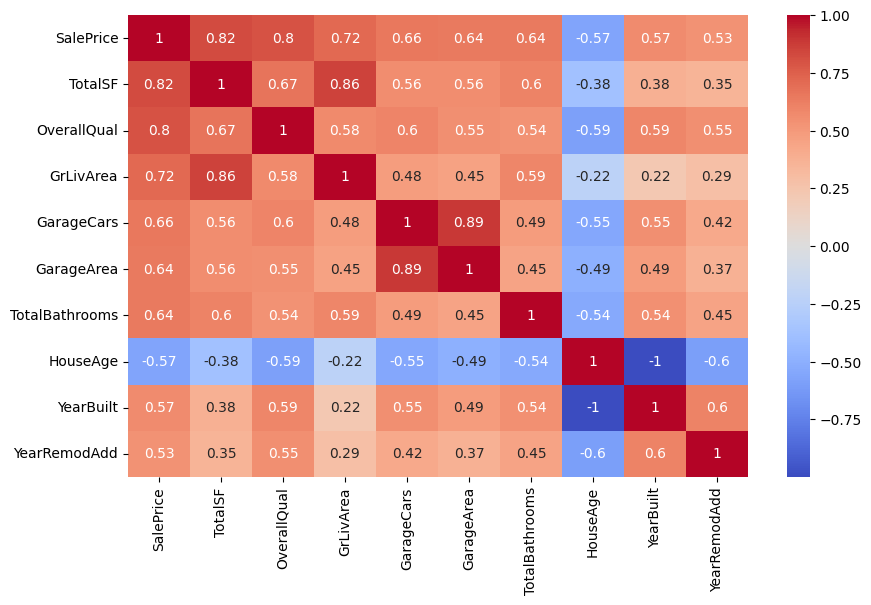

In [2278]:
import seaborn as sns
corr_matrix = trainingSet.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)

p.figure(figsize=(10, 6))
sns.heatmap(trainingSet[top_corr.index].corr(), annot=True, cmap='coolwarm')
p.show()


In [2279]:
trainingSet = trainingSet.drop(columns=['GrLivArea', 'GarageArea'])
testingSet = testingSet.drop(columns=['GrLivArea', 'GarageArea'])

In [2280]:
trainingSet.dtypes[trainingSet.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [2281]:
trainingSet.dtypes[trainingSet.dtypes != 'object']

MSSubClass          int64
LotArea             int64
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
MasVnrArea        float64
BsmtFinSF1          int64
BsmtFinSF2          int64
BsmtUnfSF           int64
LowQualFinSF        int64
BedroomAbvGr        int64
KitchenAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageYrBlt       float64
GarageCars          int64
WoodDeckSF          int64
OpenPorchSF         int64
EnclosedPorch       int64
3SsnPorch           int64
ScreenPorch         int64
PoolArea            int64
MiscVal             int64
MoSold              int64
YrSold              int64
SalePrice           int64
TotalSF             int64
HouseAge            int64
TotalBathrooms    float64
dtype: object

In [2282]:
trainingSet['SalePrice'] = np.log1p(trainingSet['SalePrice'])

num = trainingSet.select_dtypes(include = ['int64', 'float64']).columns
num = num.drop('SalePrice')

In [2283]:
ordinalCols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', 
               'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 
               'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond'];

In [2284]:
nominalCols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
               'RoofStyle', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation',  'Electrical', 
               'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [2285]:
y = trainingSet['SalePrice']
x = trainingSet.drop(columns='SalePrice', axis = 1)

In [2286]:
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

available_columns = x.columns.tolist()

num_filtered = [col for col in num if col in available_columns]
ordinalCols_filtered = [col for col in ordinalCols if col in available_columns]
nominalCols_filtered = [col for col in nominalCols if col in available_columns]

numeric_pipeline = Pipeline([ 
                ('imputation', SimpleImputer(strategy='mean')), 
                ('standardization', StandardScaler()) ])

ordinal_pipeline = Pipeline([ 
                ('imputation', SimpleImputer(strategy='most_frequent')), 
                ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) ])

nominal_pipeline = Pipeline([ 
                ('imputation', SimpleImputer(strategy='most_frequent')), 
                ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) ])

colTrans = ColumnTransformer(transformers=[ 
        ('numeric_pipeline', numeric_pipeline, num_filtered), 
        ('ordinal_encoder_pipeline', ordinal_pipeline, ordinalCols_filtered), 
        ('one_hot_encoder_pipeline', nominal_pipeline, nominalCols_filtered)], 
        remainder='drop', n_jobs=-1)

In [2287]:
full_pipeline = Pipeline(steps=[('preprocessing', colTrans)])

In [2288]:
colTrans.fit(x) 
#x_train_preprocessed = colTrans.transform(x)
x_test_preprocessed = colTrans.transform(testingSet)

In [2289]:
x_preprocessed = full_pipeline.fit_transform(x)

In [2290]:
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

In [2291]:
# training

In [2292]:
object_columns = x.select_dtypes(include=['object']).columns.tolist()
print("Object columns:", object_columns)

Object columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [2293]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

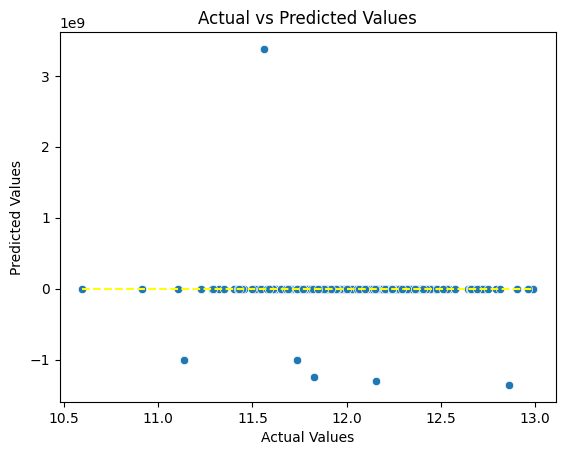

Mean Squared Error: 6.434256439444341e+16
R² Score: -4.4771688645777056e+17


In [2294]:
from sklearn.metrics import mean_squared_error, r2_score

p.figure()
yPredict = model.predict(x_test)
sns.scatterplot(x=y_test, y=yPredict)
p.xlabel('Actual Values')
p.ylabel('Predicted Values')
p.title('Actual vs Predicted Values')

# Add a diagonal line for reference
p.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='--')

p.show()

mse = mean_squared_error(y_test, yPredict)
r2 = r2_score(y_test, yPredict)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

In [2295]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


pipeline = Pipeline([('scaler', StandardScaler()),('ridge', Ridge())])
parameterGrd = {'ridge__alpha': np.logspace(-4, 4, 10),'ridge__fit_intercept': [True, False]}

In [2296]:
gridSearch = GridSearchCV(estimator=pipeline, param_grid=parameterGrd,scoring='neg_mean_squared_error', cv=5)
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'ridge__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [2297]:
ypred = gridSearch.predict(x_test)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test R² Score: {r2}')

Test Mean Squared Error: 0.020477235367155535
Test R² Score: 0.8575126100718864


In [2298]:
y_training_pred = gridSearch.predict(x_train)
training_mse = mean_squared_error(y_train, y_training_pred)
training_r2 = r2_score(y_train, y_training_pred)

print(f'Training Mean Squared Error: {training_mse}')
print(f'Training R² Score: {training_r2}')

Training Mean Squared Error: 0.008398496947860956
Training R² Score: 0.9453921810261241


In [2299]:
ridge_model = gridSearch.best_estimator_.named_steps['ridge']
print("Coefficients:", ridge_model.coef_)

Coefficients: [-4.83674360e-03  2.21908857e-02  5.87548203e-02  3.34220546e-02
  1.68586177e-02  1.78464481e-02  1.30416660e-02  3.01170984e-02
  5.59019440e-03  5.34716281e-03  5.23042951e-03  5.70596715e-03
 -2.31803109e-03  2.89660766e-02  2.16316618e-02  9.68703122e-03
  3.30720157e-02  1.40953255e-02  1.04429073e-02  4.51419450e-03
  4.86421054e-03  9.62799704e-03  5.38403231e-03 -1.81630377e-03
 -3.81740945e-03 -4.21019077e-03  7.44952281e-02 -1.70119953e-02
  2.19924595e-02  2.04645387e-04 -4.03305351e-03 -4.72029023e-03
 -1.30182457e-03 -1.71776867e-02 -4.06942282e-03  1.78312569e-02
  1.07524804e-02 -6.74780817e-03  4.94126243e-03  5.18010902e-03
  5.94627096e-03 -1.47588801e-02 -6.78688015e-03 -1.05904533e-02
 -6.32445065e-03  7.14663444e-03 -9.62113018e-04  9.62113018e-04
  7.14074978e-04  7.79399216e-03 -6.34705131e-03 -2.88169519e-03
 -2.29091024e-03  2.68781982e-04 -1.83706892e-03 -7.73339202e-03
  3.17567894e-03 -1.88100501e-03  9.21182664e-05  2.24845388e-02
 -1.1608832

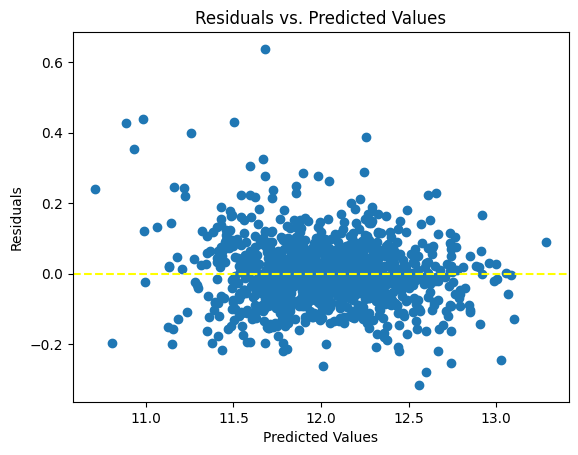

In [2300]:
p.scatter(y_training_pred, y_training_pred - y_train)
p.xlabel("Predicted Values")
p.ylabel("Residuals")
p.title("Residuals vs. Predicted Values")
p.axhline(0, color='yellow', linestyle='--')
p.show()

In [2301]:
results = gridSearch.cv_results_
print("Mean CV MSE Scores:", -results['mean_test_score'])

Mean CV MSE Scores: [1.39478692e-02 1.44420088e+02 1.39471383e-02 1.44420082e+02
 1.39416114e-02 1.44420041e+02 1.39054261e-02 1.44419765e+02
 1.37808916e-02 1.44418802e+02 1.36017851e-02 1.44418305e+02
 1.34276519e-02 1.44421326e+02 1.29972988e-02 1.44421683e+02
 1.73609434e-02 1.44423263e+02 5.43176483e-02 1.44470144e+02]


In [2302]:
print(f"Best parameters: {gridSearch.best_params_}")
print(f"Best cross-validation score: {gridSearch.best_score_:.4f}")

Best parameters: {'ridge__alpha': 166.81005372000558, 'ridge__fit_intercept': True}
Best cross-validation score: -0.0130


In [2303]:
res = pd.DataFrame(gridSearch.cv_results_)
res = res.sort_values('rank_test_score')
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ridge__alpha', 'param_ridge__fit_intercept', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [2304]:
bestPipe = gridSearch.best_estimator_

In [2305]:
#dagshub

In [2306]:
!pip install dagshub

In [2307]:
import dagshub
dagshub.init(repo_owner='jgushiann', repo_name='ML-House_Pricing', mlflow=True)

Initialized MLflow to track repo "jgushiann/ML-House_Pricing"

Repository jgushiann/ML-House_Pricing initialized!

In [2308]:
!pip install mlflow

In [2309]:
# Linear Regression Model

In [2310]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

mlflow.set_experiment("Linear Regression Model")

active_run = mlflow.active_run()
if active_run is not None:
    mlflow.end_run()
with mlflow.start_run():
    model = LinearRegression()
    
    model.fit(x_train, y_train)
    
    ypred = model.predict(x_test)
    y_training_pred = model.predict(x_train)
    
    mse = mean_squared_error(y_test, ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, ypred)
    r2 = r2_score(y_test, ypred)
    
    n = len(y_test)
    k = x_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    aic = n * np.log(mse) + 2 * k
    bic = n * np.log(mse) + k * np.log(n)
    
    train_r2 = r2_score(y_train, y_training_pred)
    
    n_train = len(y_train)
    f_stat = (train_r2 / k) / ((1 - train_r2) / (n_train - k - 1))
    f_p_value = 1 - stats.f.cdf(f_stat, k, n_train - k - 1)


🏃 View run persistent-moose-599 at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/0/runs/8430a200e48a40d285134a9cf5ad3057
🧪 View experiment at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/0


In [2311]:
mlflow.log_metric("MSE", mse)
mlflow.log_metric("RMSE", rmse)
mlflow.log_metric("MAE", mae)
mlflow.log_metric("R²", r2)
mlflow.log_metric("Adjusted R²", adj_r2)
mlflow.log_metric("AIC", aic)
mlflow.log_metric("BIC", bic)
mlflow.log_metric("F-statistic", f_stat)
mlflow.log_metric("F-p-value", f_p_value)


input_example = x_train[:5] 
mlflow.sklearn.log_model(
    model, 
    "linear_regression_model",
    input_example=input_example
)

In [2312]:
print(f"📈 Model Performance:")
print(f"R²: {r2:.4f} | Adjusted R²: {adj_r2:.4f}")
print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | MSE: {mse:.4f}")
print(f"AIC: {aic:.2f} | BIC: {bic:.2f}")
print(f"F-statistic: {f_stat:.4f} | p-value: {f_p_value:.4e}")

📈 Model Performance:
R²: -447716886457770560.0000 | Adjusted R²: -1396682026232392960.0000
MAE: 32282024.4448 | RMSE: 253658361.5701 | MSE: 64342564394443408.0000
AIC: 11536.46 | BIC: 12250.74
F-statistic: 95.9092 | p-value: 1.1102e-16


In [2313]:
mlflow.set_tag("Model", "Linear Regression")

In [2314]:
# Polynomial Regression Model

In [2315]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2316]:
active_run = mlflow.active_run()
if active_run is not None:
    mlflow.end_run()
mlflow.set_experiment("Polynomial_Regression_experiment")
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
     ('regression', LinearRegression())
])
paramGrid = {
    'poly_features__degree': range(1, 3),
    'regression__fit_intercept': [True, False]
}
def calculate_adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
gridSearch = GridSearchCV(estimator=pipeline, param_grid=paramGrid, scoring='neg_mean_squared_error', cv=5)
with mlflow.start_run(run_name="polynomial_regression_grid_search") as mlflow_run:
        run_id = mlflow_run.info.run_id
        gridSearch.fit(x_train, y_train)
        mlflow.log_params(gridSearch.best_params_)
        y_pred = gridSearch.predict(x_test)
        y_train_pred = gridSearch.predict(x_train)
        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)
        test_mae = mean_absolute_error(y_test, y_pred)
        best_degree = gridSearch.best_params_['poly_features__degree']
        fit_intercept = gridSearch.best_params_['regression__fit_intercept']
        p = best_degree + (1 if fit_intercept else 0)
        
        test_adj_r2 = calculate_adjusted_r2(test_r2, len(y_test), p)
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_adj_r2 = calculate_adjusted_r2(train_r2, len(y_train), p)
        n = len(y_test)
        f_stat = (test_r2 / p) / ((1 - test_r2) / (n - p - 1))
        f_p_value = 1 - stats.f.cdf(f_stat, p, n - p - 1)
        aic = n * np.log(test_mse) + 2 * p
        bic = n * np.log(test_mse) + np.log(n) * p
        metrics = {
            "test_mse": test_mse,
            "test_rmse": test_rmse,
            "test_r2": test_r2,
            "test_adj_r2": test_adj_r2,
            "test_mae": test_mae,
            "train_mse": train_mse,
            "train_rmse": train_rmse,
            "train_r2": train_r2,
            "train_adj_r2": train_adj_r2,
            "train_mae": train_mae,
            "f_statistic": f_stat,
            "f_p_value": f_p_value,
            "aic": aic,
            "bic": bic
        }
        mlflow.log_metrics(metrics)
        cv_scores = cross_val_score(gridSearch.best_estimator_, x_train, y_train, cv=5)
        mlflow.log_metric("cv_mean_score", cv_scores.mean())
        mlflow.log_metric("cv_std_score", cv_scores.std())
        reg_model = gridSearch.best_estimator_.named_steps['regression']
        mlflow.log_param("coefficients", reg_model.coef_.tolist())
        
    
        if hasattr(x_train, 'iloc'):
            input_example = x_train.iloc[:5]
        else:
            input_example = x_train[:5]
            
        mlflow.sklearn.log_model(gridSearch.best_estimator_, "best_model", input_example=input_example)
        print("\nPolynomial Regression Results:")
        print(f"Best parameters: {gridSearch.best_params_}")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Test R²: {test_r2:.4f}")
        print(f"Test Adjusted R²: {test_adj_r2:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"F-statistic: {f_stat:.4f} (p-value: {f_p_value:.4f})")
        print(f"AIC: {aic:.4f}")
        print(f"BIC: {bic:.4f}")
        print(f"Cross-validation mean score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



🏃 View run big-whale-968 at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/0/runs/2526ad5bc0a0474caec4878f502e2710
🧪 View experiment at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/0

Polynomial Regression Results:
Best parameters: {'poly_features__degree': 2, 'regression__fit_intercept': True}
Test RMSE: 0.2025
Test R²: 0.7147
Test Adjusted R²: 0.7117
Test MAE: 0.1316
F-statistic: 237.1862 (p-value: 0.0000)
AIC: -913.9496
BIC: -902.9608
Cross-validation mean score: 0.8534 (±0.0108)
🏃 View run polynomial_regression_grid_search at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/1/runs/4f637dd8ccc3468b896bcc0b50ce5206
🧪 View experiment at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/1


In [2317]:
# XGBoost

In [2318]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, median_absolute_error
import mlflow.xgboost

paramGrid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
gridSearch = GridSearchCV(estimator=model, param_grid=paramGrid, scoring='neg_mean_squared_error', cv=5)
gridSearch.fit(x_train, y_train)
best_model = gridSearch.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
median_mae = median_absolute_error(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance: {explained_variance}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Median Absolute Error: {median_mae}")
print(f"Best Hyperparameters: {gridSearch.best_params_}")


experiment_name = "XGBoost Regression"
mlflow.set_experiment(experiment_name)

with mlflow.start_run(description="XGBoost Model Training") as run:
    # best parameters from the grid search
    best_params = gridSearch.best_params_
    mlflow.log_params(best_params)
    
    mlflow.log_param("objective", "reg:squarederror")
    mlflow.log_param("eval_metric", "rmse")
    
    
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dtest = xgb.DMatrix(x_test, label=y_test)
    mlflow.log_metrics({
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "explained_variance": explained_variance,
        "mape": mape,
        "median_mae": median_mae
    })
    
    signature = mlflow.models.signature.infer_signature(x_test, y_pred)
    
    mlflow.xgboost.log_model(
        best_model, 
        "model",
        signature=signature,
        input_example=x_test[0:5] if not isinstance(x_test, pd.DataFrame) else x_test[0:5],
        model_format="json"
    )
    
    print(f"\nMLflow run ID: {run.info.run_id}")
    print(f"Experiment ID: {run.info.experiment_id}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.019529582554352984
Root Mean Squared Error (RMSE): 0.13974828283150023
Mean Absolute Error (MAE): 0.09137621632558456
R-squared (R2): 0.8641066923995647
Explained Variance: 0.865202561477084
Mean Absolute Percentage Error (MAPE): 0.00766901247704431
Median Absolute Error: 0.06173243514525151
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

MLflow run ID: d4c0f21e3d184469ba4456e6e09fb555
Experiment ID: 2
🏃 View run abundant-crow-264 at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/2/runs/d4c0f21e3d184469ba4456e6e09fb555
🧪 View experiment at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/2


In [2319]:
mlflow.set_experiment("XGBoost_Regressor_Experiment")
with mlflow.start_run():
    param_grid = {
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200]
    }
    model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    gridSearch.fit(x_train, y_train)
    best_model = gridSearch.best_estimator_
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    median_mae = median_absolute_error(y_test, y_pred)
    mlflow.log_params(gridSearch.best_params_)
    mlflow.log_metrics({
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Explained Variance": explained_variance,
        "MAPE": mape,
        "Median Absolute Error": median_mae
    })
   # mlflow.xgboost.log_model(best_model, "model")
    mlflow.xgboost.log_model(
        best_model, 
        "model",
        signature=signature,
        input_example=x_test[0:5] if not isinstance(x_test, pd.DataFrame) else x_test[0:5],
        model_format="json"
    )

🏃 View run skittish-cub-421 at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/3/runs/176672f65a1040bea4187a00f9391aa5
🧪 View experiment at: https://dagshub.com/jgushiann/ML-House_Pricing.mlflow/#/experiments/3


In [2320]:
print(f"Best Hyperparameters: {gridSearch.best_params_}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [2321]:
import mlflow.pyfunc
import joblib
import os

print(mlflow.get_tracking_uri())
modelURL = "runs:/1e14c44765db441dbd792148990e879a/model"
modelName = "XGboostModel"

mlflow.register_model(modelURL, modelName)

!pip install mlflow xgboost pandas scikit-learn


model_Name = "XGboostModel"

model = mlflow.pyfunc.load_model(f"models:/{modelName}/1")


https://dagshub.com/jgushiann/ML-House_Pricing.mlflow


Registered model 'XGboostModel' already exists. Creating a new version of this model...
2025/04/10 13:02:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGboostModel, version 9
Created version '9' of model 'XGboostModel'.


In [2322]:
joblib.dump(x_test_preprocessed, '/kaggle/working/x_test_preprocessed.pkl')
predictions = model.predict(x_test_preprocessed)

submission_df = pd.DataFrame({
    'id': range(1, len(predictions) + 1), 
    'prediction': predictions
})
submission_df.to_csv('submission.csv', index=False)

In [2323]:
print(os.getcwd())

/kaggle/working


In [2324]:
submission_df = pd.read_csv('/kaggle/working/submission.csv')
submission_df.head()

,id,prediction
0,1,11.701975
1,2,11.980483
2,3,12.108768
3,4,12.192595
4,5,12.137924
